## Cluster Analysis

Goal: group observations that have similar distances to cluster means.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/martinwg/ISA630/master/data/Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
## dropping customer id
df.drop("CustomerID", inplace = True, axis = 1)
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [ ]:
## getting dummies for all categorical vars
df = pd.get_dummies(df, drop_first = True)
df

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,0
196,45,126,28,0
197,32,126,74,1
198,32,137,18,1


<Axes: xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

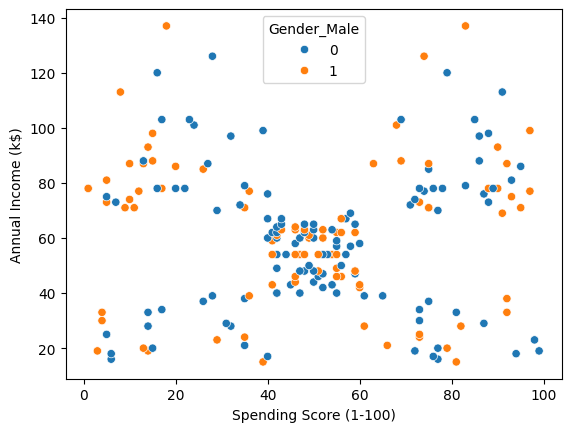

In [ ]:
import seaborn as sns

sns.scatterplot(data = df, x = "Spending Score (1-100)", y =  "Annual Income (k$)", hue = "Gender_Male")

<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

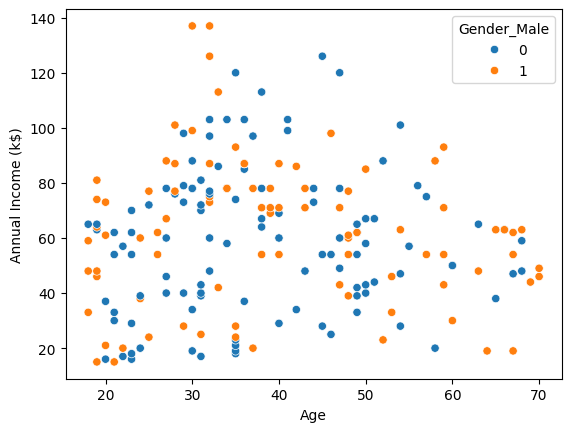

In [ ]:
sns.scatterplot(data = df, x = "Age", y =  "Annual Income (k$)", hue = "Gender_Male")

In [ ]:
## vector for obs 1
cust0 = df.iloc[0].values

In [ ]:
## vectorize obs 2
cust1 = df.iloc[1].values

In [ ]:
cust1

array([21, 15, 81,  1])

In [ ]:
cust0

array([19, 15, 39,  1])

## **Euclidian Distance**

L2 norm of the difference is the most common distance metric.

In [ ]:
## use norm function
np.linalg.norm(cust0 - cust1)

42.04759208325728

In [ ]:
## use module
from scipy.spatial import distance

distance.euclidean(cust1, cust0)

42.04759208325728

## Normalize or Standardize the Data

This is required for euclidian distance so that every variable has the same impact.

In [ ]:
from sklearn.preprocessing import StandardScaler

## instance
sc = StandardScaler()

## fit transform
df_std = sc.fit_transform(df)
df_std = pd.DataFrame(df_std, columns = df.columns)

In [ ]:
df_std

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405
...,...,...,...,...
195,-0.276302,2.268791,1.118061,-0.886405
196,0.441365,2.497807,-0.861839,-0.886405
197,-0.491602,2.497807,0.923953,1.128152
198,-0.491602,2.917671,-1.250054,1.128152


## **Agglomerative Methods**

Group observations starting one by one, join them to different groups until just one big cluster.

WARD's method - calculates the error inside the cluster and create the clusters that minimize the error (SSE).

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [ ]:
## WARD'S METHOD - AGGLOMERATIVE
hc = AgglomerativeClustering(n_clusters=5, metric = "euclidean", linkage = "ward")
hc.fit_predict(df_std)  ## outputs the clusters

array([0, 0, 3, 0, 3, 0, 3, 0, 4, 0, 4, 0, 3, 0, 0, 0, 3, 0, 4, 0, 0, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 4, 0, 4, 0, 3, 0, 3, 0, 3, 0, 3, 0, 4, 0,
       3, 0, 3, 0, 0, 0, 3, 0, 0, 4, 3, 4, 3, 4, 0, 4, 4, 0, 3, 3, 4, 0,
       3, 3, 0, 0, 4, 3, 3, 3, 4, 0, 3, 4, 0, 3, 4, 4, 4, 3, 0, 4, 3, 0,
       0, 3, 3, 0, 4, 0, 0, 0, 3, 0, 4, 0, 0, 3, 4, 0, 4, 0, 3, 4, 4, 4,
       4, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 1, 0, 1, 4, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 4, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

#### **hyperparameter: n_clusters**

* Dendrogram: only possible with few obs
* Elbow method: meant for k-means, non-hierarchical algorithm

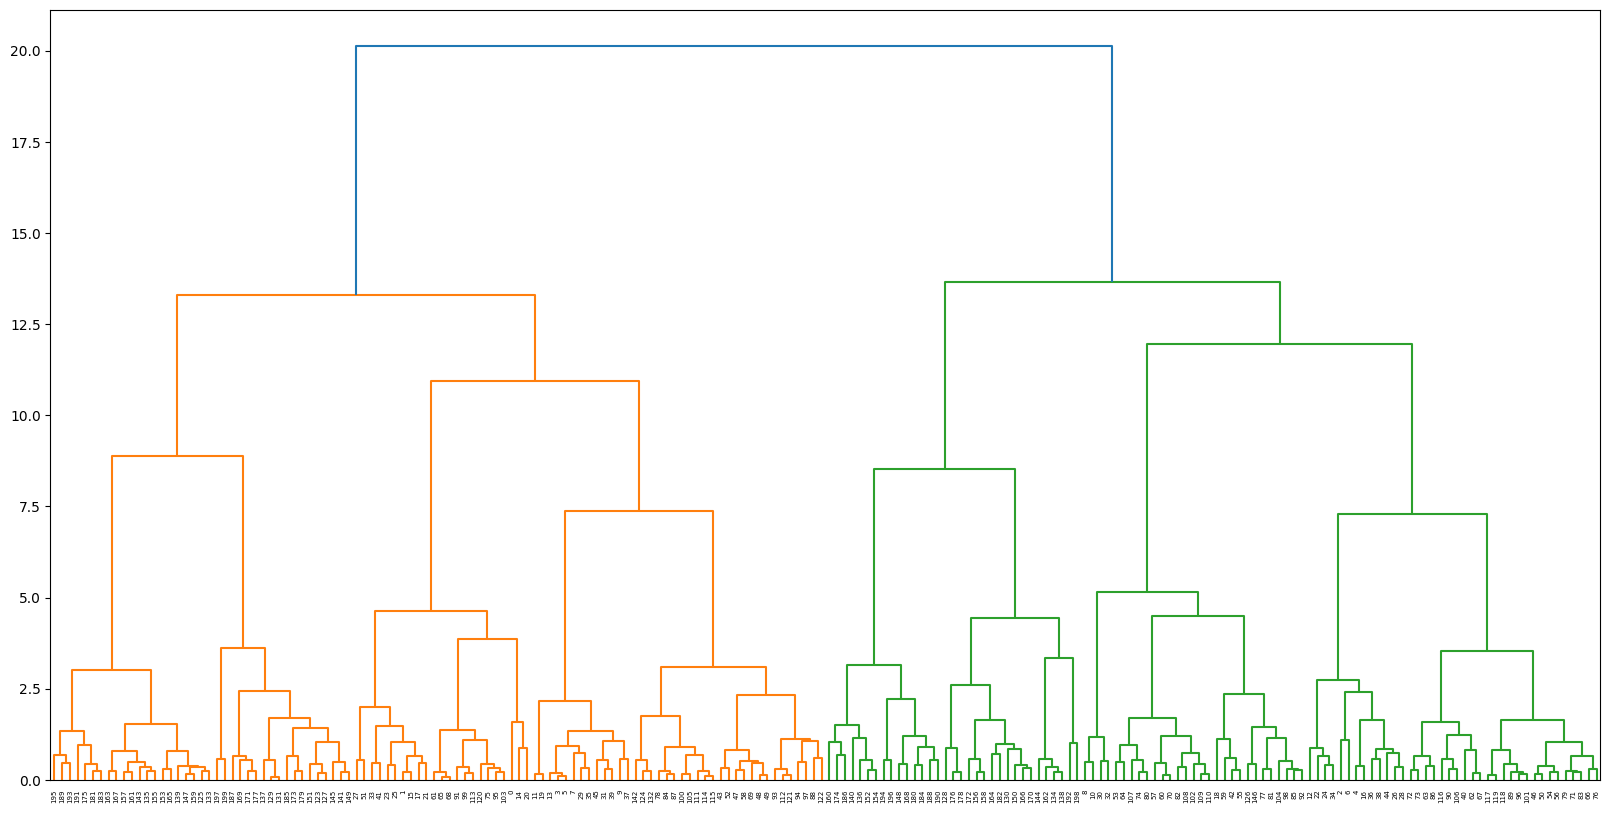

In [ ]:
## DENDROGRAM
plt.figure(figsize = (20,10))
linkage_data = linkage(df_std, method = "ward", metric = "euclidean")
dendrogram(linkage_data);

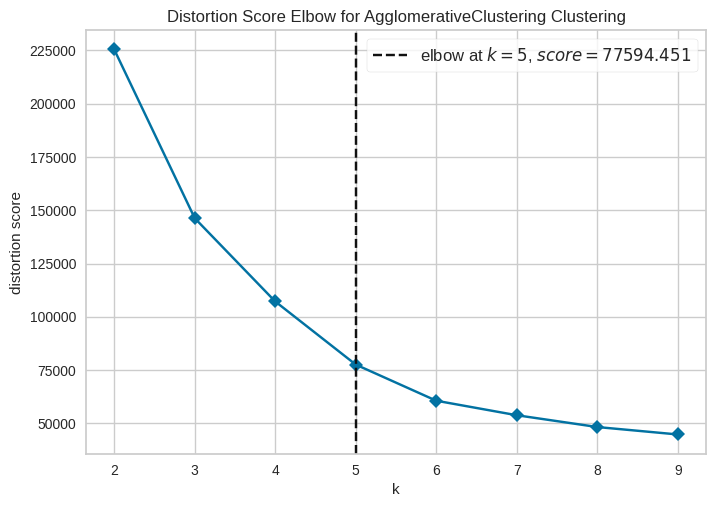

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
## ELBOW METHOD - MIGHT NOT CONVERGE
from yellowbrick.cluster import KElbowVisualizer  ## finds the elbow for you

hc = AgglomerativeClustering()  ## no n_cluster
vis = KElbowVisualizer(hc, k = (2,10), timings = False)
vis.fit(df)
vis.show()

In [ ]:
## k = 10\
hc = AgglomerativeClustering(n_clusters=10, metric = "euclidean", linkage = "ward")
labels = hc.fit_predict(df_std)  ## outputs the clusters

In [ ]:
df['Assigned Cluster'] = labels

In [ ]:
df

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,Assigned Cluster
0,19,15,39,1,2
1,21,15,81,1,2
2,20,16,6,0,9
3,23,16,77,0,8
4,31,17,40,0,9
...,...,...,...,...,...
195,35,120,79,0,6
196,45,126,28,0,7
197,32,126,74,1,5
198,32,137,18,1,1


## **NON-HIERARCHICAL METHODS**

* K-means: best bet b/c it is easier to find k
* DBSCAN: newest method, difficult to find k

In [ ]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

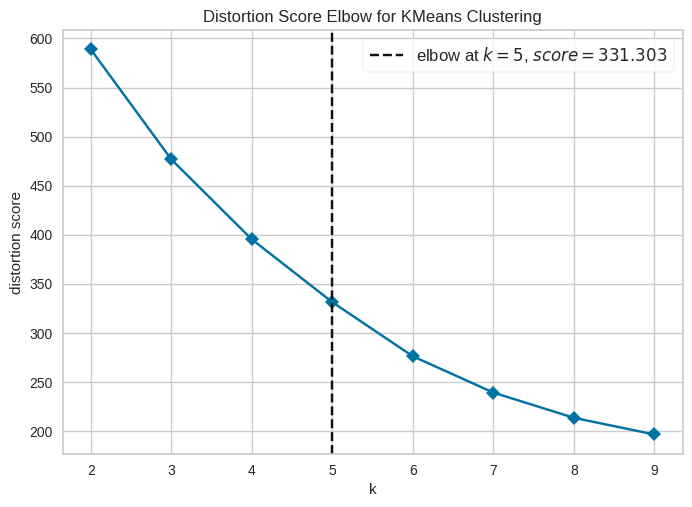

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
kmeans = KMeans(n_init = "auto")  ## no n_cluster
vis = KElbowVisualizer(kmeans, k = (2,10), timings = False)
vis.fit(df_std)
vis.show()